In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [3]:
lof_df = pd.read_csv('../dataframe_creation/complete_dataframe.csv', index_col=0, parse_dates=True)
lof_df = lof_df.fillna(1)

In [4]:
intersections = [
    'K302','K173','K414','K158','K402','K305',
    'K071','K097','K124','K128','K159','K184','K189','K206','K225','K270','K304','K405','K406','K424','K430','K703','K704','K707','K711','K561','K504','K145','K250',
    'a12in','a12out','n211in','n211out','n141in','n141out','n142in','n142out','n143in','n143out'
]

In [5]:
def calc_corr_top_k(df,intersection,k):
    correlations = []
    one = df[intersection].sort_values(ascending=False).tail(k)
    one = one.index
    for column2 in df.columns:
        if column2 in ['from_dh','to_dh','M','R','S','O','school_holiday','other_holidays']:
            two = df[df[column2] == 1]
            two = two.index
        else:
            two = df[column2].sort_values(ascending=False).tail(k)
            two = two.index
        overlap = sum(el in one for el in two)
        correlation = round(overlap/k,2)
        correlations.append(correlation)
    return correlations

In [6]:
def all_corr(df,intersections,k):
    correlations = []
    for intersection in intersections:
        correlations.append(calc_corr_top_k(df,intersection,k))
    return correlations

In [7]:
def calc_corr_top_k_bigger_window(df,intersection,k):
    correlations = []
    one = df[intersection].sort_values(ascending=False).tail(k)
    one = list(one.index)
    col_one = []
    for datetime in one: #add +1/-1 hour to list
        col_one.append(datetime)
        col_one.append(datetime-pd.Timedelta(hours=1))
        col_one.append(datetime+pd.Timedelta(hours=1))    
    for column2 in df.columns:
        if column2 in ['from_dh','to_dh','M','R','S','O','school_holiday','other_holidays']:
            two = df[df[column2] == 1]
            two = two.index
        else:
            two = df[column2].sort_values(ascending=False).tail(k)
            two = list(two.index)
        overlap = sum(el in col_one for el in two)
        correlation = round(overlap/k,2)
        correlations.append(correlation)
    return correlations

In [8]:
def bigger_window_all_corr(df,intersections,k):
    correlations = []
    for intersection in intersections:
        correlations.append(calc_corr_top_k_bigger_window(df,intersection,k))
    return correlations

# TOP K outlier correlation

In [9]:
current_fpd_lof = all_corr(lof_df,intersections,50)
current_fpd_lof = pd.DataFrame(current_fpd_lof)
current_fpd_lof.columns = lof_df.columns
current_fpd_lof = current_fpd_lof.set_index(lof_df.columns[:39])

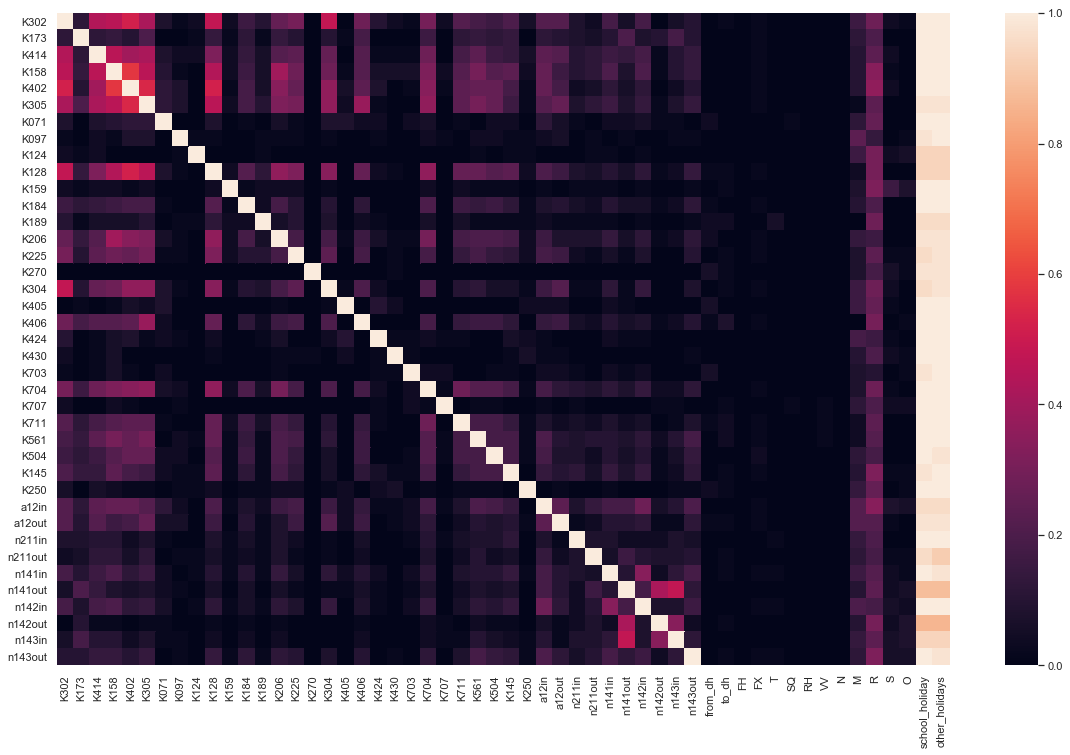

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(current_fpd_lof, ax=ax)

In [11]:
current_fpd_lof.to_csv('./correlation_current.csv')